In [19]:
from pathlib import Path
import json

from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

_seed = 1337
np.random.seed(_seed)

In [13]:
# j = json.loads(Path("./hand-tracks-1738314216758.json").read_bytes())
j = json.loads(Path("./hand-tracks-1738315484642.json").read_bytes())


In [20]:
display(j[0]["startTime"])
display(j[0].keys())
display(len(j[0]["data"]))

1738315459183

dict_keys(['startTime', 'columns', 'data'])

472

In [56]:
def get_track(jj):
    df = pd.DataFrame(columns=jj["columns"], data=jj["data"]).set_index("timedelta", drop=True)
    df["isTouching"] = df["isTouching"].astype(bool)

    # Locations where fingers start/stop touching
    diffs = np.diff(df["isTouching"].astype(int))
    false_to_true = np.where(diffs == 1)[0] + 1
    true_to_false = np.where(diffs == -1)[0] + 1

    return df, false_to_true, true_to_false

df, false_to_true, true_to_false = get_track(j[2])
df.sample(n=3)

,wrist_x,wrist_y,thumbTip_x,thumbTip_y,indexTip_x,indexTip_y,isTouching
timedelta,,,,,,,
971,0.796828,0.766799,0.588468,0.519934,0.643111,0.373222,False
151,0.845214,0.820390,0.633245,0.555252,0.688858,0.424989,False
362,0.847551,0.821723,0.637396,0.557853,0.691979,0.430194,False


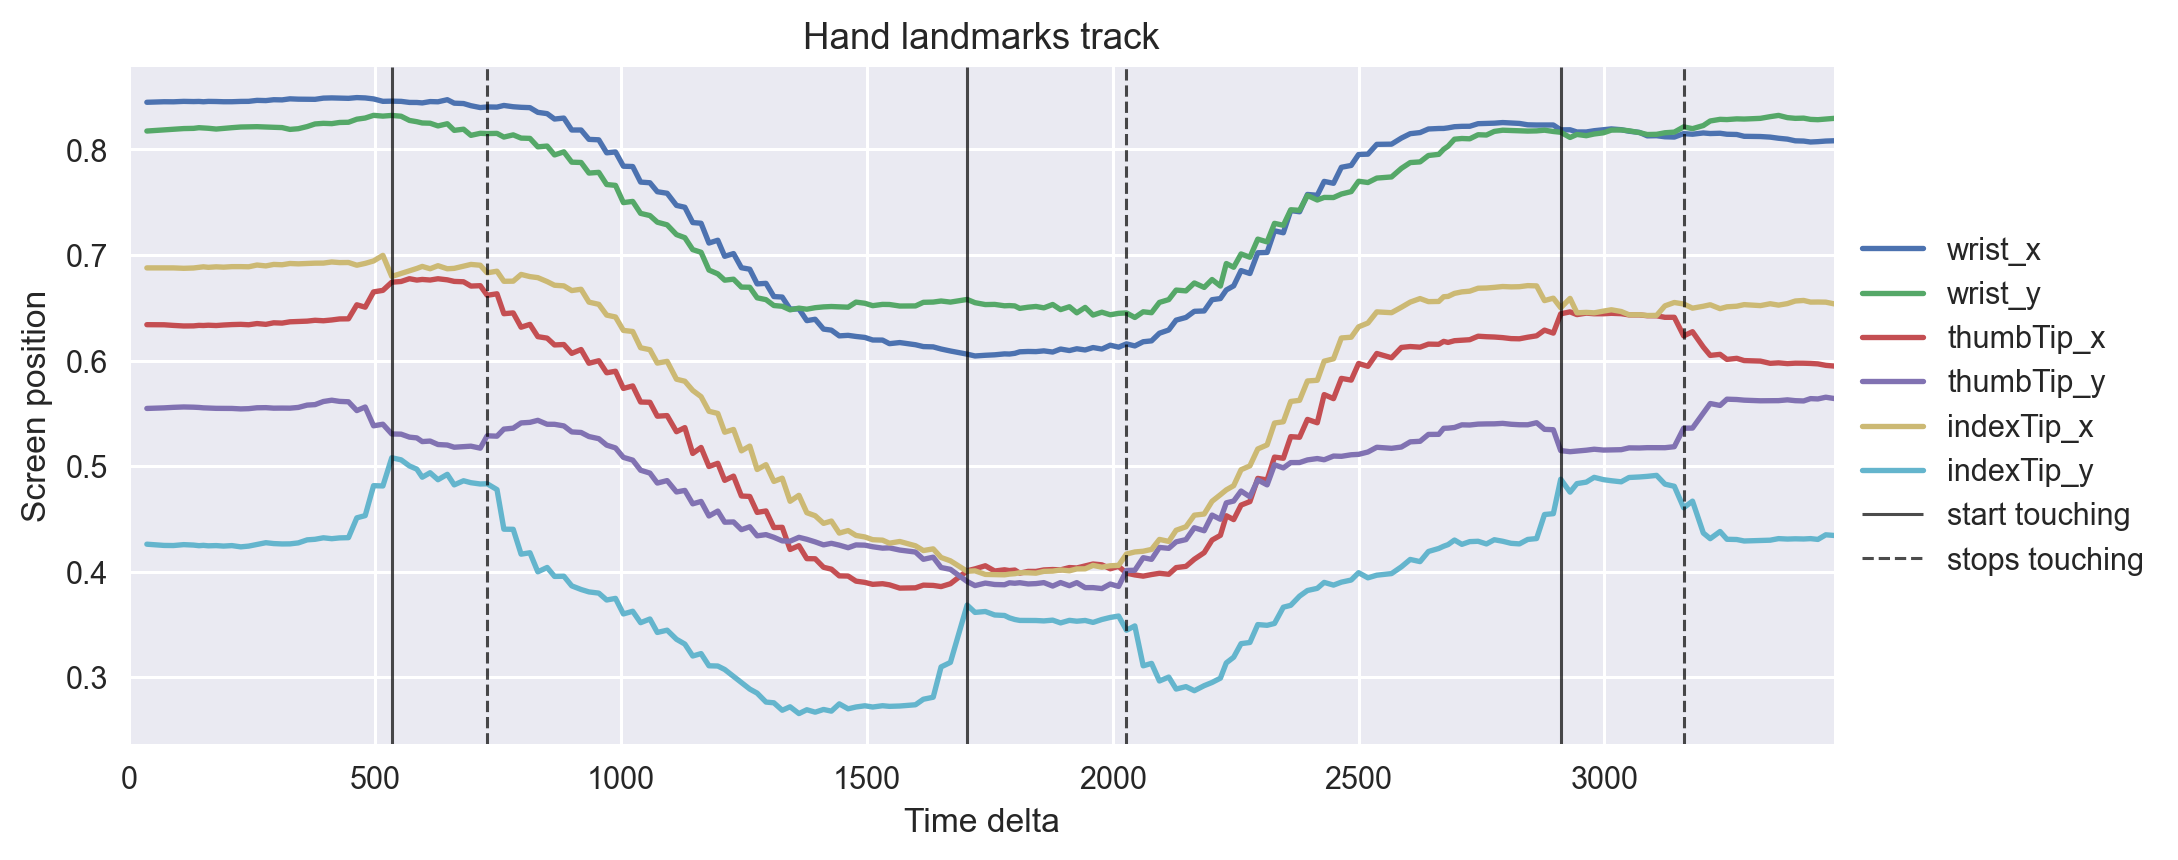

In [57]:
fig, ax = plt.subplots(dpi=220, figsize=(10, 4))
ax = df.plot(ax=ax)
ax.set_xlim(0, df.index[-1])

y_lims = ax.get_ylim()

_opt = dict(colors="black", linewidth=1.0, alpha=0.7)

for idx in df.index[false_to_true[:1]]:
    ax.vlines(idx, *y_lims, linestyle="-", label="start touching", **_opt)
for idx in df.index[false_to_true[1:]]:
    ax.vlines(idx, *y_lims, linestyle="-", **_opt)
    
for idx in df.index[true_to_false[:1]]:
    ax.vlines(idx, *y_lims, linestyle="--", label="stops touching", **_opt)
for idx in df.index[true_to_false[1:]]:
    ax.vlines(idx, *y_lims, linestyle="--", **_opt)

ax.set_ylim(y_lims)
ax.set_ylabel("Screen position")
ax.set_xlabel("Time delta")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_title("Hand landmarks track")

plt.show()

In [22]:
df.dtypes

timedelta       int64
wrist_x       float64
wrist_y       float64
thumbTip_x    float64
thumbTip_y    float64
indexTip_x    float64
indexTip_y    float64
isTouching      int64
dtype: object

In [15]:
j[0]["data"][:3]

[[24, 0.848471, 0.803882, 0.663072, 0.590532, 0.684314, 0.525857, 0],
 [41, 0.848679, 0.804005, 0.662916, 0.590583, 0.683844, 0.525289, 0],
 [58, 0.848932, 0.804121, 0.662941, 0.591602, 0.684618, 0.522339, 0]]